In [1]:
!pip install mxnet

  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
  Using cached graphviz-0.8.4-py2.py3-none-any.whl (16 kB)
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


In [2]:
from mxnet import nd

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
x = nd.arange(12)
x
y = nd.arange(12)
y


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
<NDArray 12 @cpu(0)>

In [4]:
x==y



[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
<NDArray 12 @cpu(0)>

In [5]:
x.sum()
x.norm().asscalar()

22.494442

In [6]:
a = nd.arange(3).reshape((3 , 1))
b = nd.arange(2).reshape((1 , 2)) 
a , b

(
 [[0.]
  [1.]
  [2.]]
 <NDArray 3x1 @cpu(0)>,
 
 [[0. 1.]]
 <NDArray 1x2 @cpu(0)>)

In [9]:
a + b


[[0. 1.]
 [1. 2.]
 [2. 3.]]
<NDArray 3x2 @cpu(0)>

In [10]:
x[1:3]


[1. 2.]
<NDArray 2 @cpu(0)>

In [11]:
x[1:2] = 9 
x


[ 0.  9.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
<NDArray 12 @cpu(0)>

In [12]:
x[0:2 , ] = 12
x


[12. 12.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
<NDArray 12 @cpu(0)>

In [13]:
before = id(y)
y = y + x 
id(y) == before
print(id(y))
print(before)
print(id(y))
print(before)

140621596114368
140617592654768
140621596114368
140617592654768


In [14]:
z = y.zeros_like()
print('id(z) :' , id(z))
z[:] = x + y
print('id(z):' , id(z))

id(z) : 140617567068224
id(z): 140617567068224


In [15]:
before = id(z)
nd.elemwise_add(x , y , out = z)
id(z) == before

True

In [16]:
before = id(x)
x += y 
id(x) == before

True

In [21]:
import numpy as np

a = x.asnumpy()
print(type(a))
b = nd.array(a)
print(type(b))

<class 'numpy.ndarray'>
<class 'mxnet.ndarray.ndarray.NDArray'>


In [2]:
from mxnet import autograd, nd, gluon, init
import d2l


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
import sys 
sys.path.insert(0, '..')

import collections
import re
with open('bible.txt','r') as f:
    lines = f.readlines()
    raw_dataset = [re.sub('[^A-Za-z]+','.',st).lower().split() for st in lines]

    
for st in raw_dataset[0:10]:
    print('# tokens:' ,len(st), st)

# tokens: 1 ['.in.the.beginning.god.created.the.heaven.and.the.earth.']
# tokens: 1 ['.']
# tokens: 1 ['.and.the.earth.was.without.form.and.void.and.darkness.was.upon.']
# tokens: 1 ['the.face.of.the.deep.and.the.spirit.of.god.moved.upon.the.face.of.the.']
# tokens: 1 ['waters.']
# tokens: 1 ['.']
# tokens: 1 ['.and.god.said.let.there.be.light.and.there.was.light.']
# tokens: 1 ['.']
# tokens: 1 ['.and.god.saw.the.light.that.it.was.good.and.god.divided.the.light.']
# tokens: 1 ['from.the.darkness.']


In [98]:
"""Optimized"""
import sys
import re
import pprint

sys.path.insert(0, "..")

# Open the file and read the lines
with open("bible.txt", "r") as f:
    lines = f.readlines()

# Preprocess the lines and create the dataset
raw_dataset = []
for line in lines:
    # Replace non-alphabetic characters with '.' and lowercase the line
    line = re.sub("[^A-Za-z]+", ".", line).lower()
    # Split the line into tokens
    tokens = line.split()
    # Add the tokens to the dataset
    raw_dataset.append(tokens)

# Print the first 10 elements of the dataset
for st in raw_dataset[:50]:
    pprint.pprint((st))

['.in.the.beginning.god.created.the.heaven.and.the.earth.']
['.']
['.and.the.earth.was.without.form.and.void.and.darkness.was.upon.']
['the.face.of.the.deep.and.the.spirit.of.god.moved.upon.the.face.of.the.']
['waters.']
['.']
['.and.god.said.let.there.be.light.and.there.was.light.']
['.']
['.and.god.saw.the.light.that.it.was.good.and.god.divided.the.light.']
['from.the.darkness.']
['.']
['.and.god.called.the.light.day.and.the.darkness.he.called.night.']
['and.the.evening.and.the.morning.were.the.first.day.']
['.']
['.and.god.said.let.there.be.a.firmament.in.the.midst.of.the.waters.']
['and.let.it.divide.the.waters.from.the.waters.']
['.']
['.and.god.made.the.firmament.and.divided.the.waters.which.were.']
['under.the.firmament.from.the.waters.which.were.above.the.firmament.']
['and.it.was.so.']
['.']
['.and.god.called.the.firmament.heaven.and.the.evening.and.the.']
['morning.were.the.second.day.']
['.']
['.and.god.said.let.the.waters.under.the.heaven.be.gathered.together.']
['unto.one.

In [4]:
counter = collections.Counter([tk for st in raw_dataset for tk in st])
#print("frequency of 'lord':", counter['lord'])
print(counter.most_common(10))
cnt=counter.most_common(10)
print(cnt)


[('.', 25243), ('lord.', 75), ('them.', 67), ('him.', 58), ('god.', 52), ('thee.', 51), ('me.', 46), ('israel.', 37), ('it.', 31), ('people.', 30)]
[('.', 25243), ('lord.', 75), ('them.', 67), ('him.', 58), ('god.', 52), ('thee.', 51), ('me.', 46), ('israel.', 37), ('it.', 31), ('people.', 30)]


In [36]:
"""In this version, we are reading the file line by line using the for st in f loop, 
which is more efficient than reading all the lines into a list first. 
We are also using a list comprehension to create the raw_dataset list, 
which is more concise and efficient than using a separate loop.
Finally, we are using tuple unpacking to assign the most_common_10 
variable to the first element of the tuple returned by counter.most_common(10). 
This avoids the need to create an extra variable cnt."""

import collections
import re

with open('bible.txt', 'r') as f:
    raw_dataset = [re.sub('[^A-Za-z]+', '.', st).lower().split() for st in f]

counter = collections.Counter([tk for st in raw_dataset for tk in st])

most_common_10 = counter.most_common(10)
pprint.pprint(most_common_10)


[('.', 25243),
 ('lord.', 75),
 ('them.', 67),
 ('him.', 58),
 ('god.', 52),
 ('thee.', 51),
 ('me.', 46),
 ('israel.', 37),
 ('it.', 31),
 ('people.', 30)]


In [35]:
import nltk

# Download the list of stop words
nltk.download('stopwords')

# Get the list of stop words
stop_words = nltk.corpus.stopwords.words('english')

# Remove stop words from the dataset
filtered_dataset = [[word for word in st if word not in stop_words] for st in raw_dataset]

# Recompute the counter with the filtered dataset
counter = collections.Counter([tk for st in filtered_dataset for tk in st])

    
# Print the most common 10 words
most_common_10 = counter.most_common(5)
pprint.pprint(most_common_10)


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('shall', 9840), ('unto', 8997), ('lord', 7964), ('thou', 5474), ('thy', 4600)]


In [34]:
import collections
import re
import nltk

# Download the list of stop words
nltk.download('stopwords')

# Get the list of stop words
stop_words = nltk.corpus.stopwords.words('english')

# Open the text file and preprocess the dataset
with open('bible.txt', 'r') as f:
    raw_dataset = [re.sub('[^A-Za-z]+', ' ', st).lower().split() for st in f]

# Remove stop words from the dataset
filtered_dataset = [[word for word in st if word not in stop_words and word != '.'] for st in raw_dataset]

# Recompute the counter with the filtered dataset
counter = collections.Counter([tk for st in filtered_dataset for tk in st])

# Create a dictionary with the counter.most_common()
counter_dict = dict((word, count) for word, count in counter.most_common() if word != '.')

# Print the 5 most popular words in descending order
for word, count in sorted(counter_dict.items(), key=lambda item: item[1], reverse=True)[:50]:
    print(f'{word}: {count}')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


shall: 9840
unto: 8997
lord: 7964
thou: 5474
thy: 4600
god: 4472
said: 3999
ye: 3983
thee: 3827
upon: 2750
man: 2735
israel: 2575
king: 2543
son: 2392
hath: 2264
people: 2146
came: 2093
house: 2024
come: 1972
one: 1971
children: 1821
also: 1771
day: 1743
land: 1718
men: 1677
shalt: 1616
let: 1511
go: 1492
hand: 1466
us: 1452
saying: 1445
made: 1405
went: 1400
even: 1395
behold: 1326
saith: 1262
therefore: 1237
every: 1236
things: 1164
father: 1127
sons: 1094
hast: 1070
david: 1064
make: 1059
say: 1056
may: 1041
earth: 987
jesus: 983
great: 962
name: 959


In [22]:
import nltk
from collections import Counter
import re

# Download the list of stop words
nltk.download('stopwords')

# Get the list of stop words
stop_words = nltk.corpus.stopwords.words('english')

# Open the text file and preprocess the dataset
with open('bible.txt', 'r') as f:
    # Only keep letters in the dataset
    raw_dataset = [re.sub('[^A-Za-z]+', '', st).lower().split() for st in f]

# Remove stop words from the dataset
filtered_dataset = [[word for word in st if word not in stop_words] for st in raw_dataset]

# Compute the counter with the filtered dataset
counter = Counter([tk for st in filtered_dataset for tk in st])

# Create a dictionary of the 25 most common phrases
most_common_25 = dict(counter.most_common(25))

# Print the dictionary in descending order
for phrase, count in sorted(most_common_25.items(), key=lambda item: item[1], reverse=True):
    print(f'{phrase}: {count}')


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


lord: 75
god: 52
thee: 51
israel: 37
people: 30
jerusalem: 30
thelord: 25
ever: 23
andthelordspakeuntomosessayingspeakuntothe: 18
selah: 16
day: 15
house: 15
christ: 15
away: 14
egypt: 14
thereof: 14
congregation: 14
endurethforever: 14
theearth: 13
hand: 13
righteousness: 12
years: 11
ofthelord: 11
earth: 11
place: 11


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


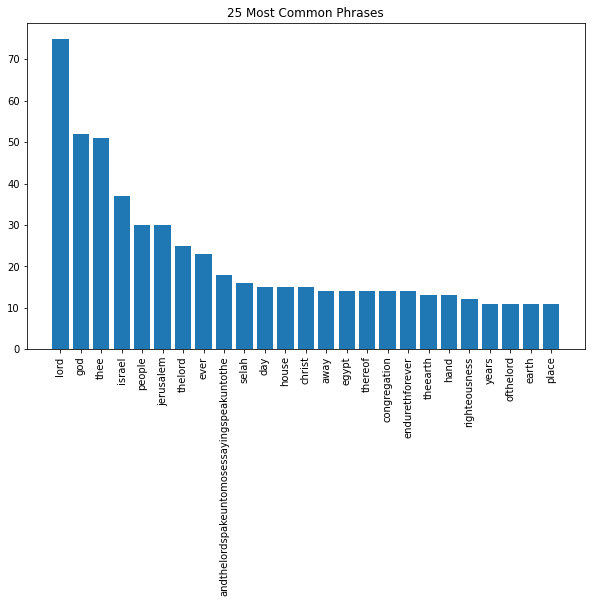

In [56]:
import nltk
from collections import Counter
import re
import matplotlib.pyplot as plt

# Download the list of stop words
nltk.download('stopwords')

# Get the list of stop words
stop_words = nltk.corpus.stopwords.words('english')

# Open the text file and preprocess the dataset
with open('bible.txt', 'r') as f:
    # Only keep letters in the dataset
    raw_dataset = [re.sub('[^A-Za-z]+', '', st).lower().split() for st in f]

# Remove stop words from the dataset
filtered_dataset = [[word for word in st if word not in stop_words] for st in raw_dataset]

# Compute the counter with the filtered dataset
counter = Counter([tk for st in filtered_dataset for tk in st])

# Create a dictionary of the 25 most common phrases
most_common_25 = dict(counter.most_common(25))

# Get the list of phrases and their counts
phrases = list(most_common_25.keys())
counts = list(most_common_25.values())

# Set the figure size and title
plt.figure(figsize=(10, 6))
plt.title("25 Most Common Phrases")

# Plot the bar chart
plt.bar(phrases, counts, color='#1f77b4')

# Rotate the x-tick labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


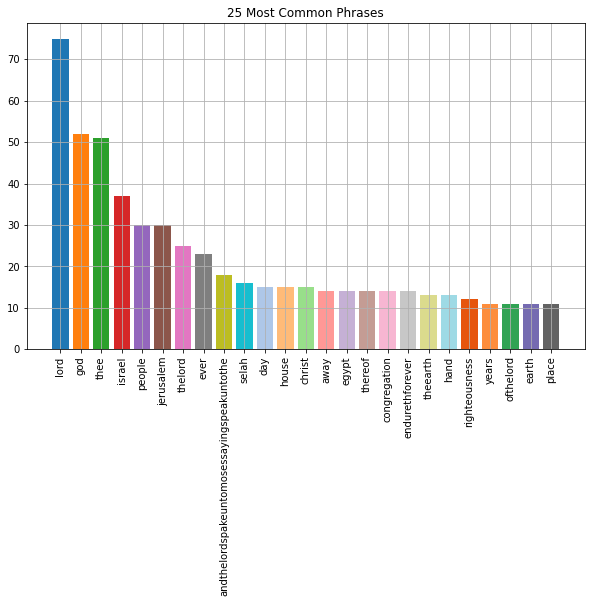

In [57]:
import nltk
from collections import Counter
import re
import matplotlib.pyplot as plt

# Download the list of stop words
nltk.download('stopwords')

# Get the list of stop words
stop_words = nltk.corpus.stopwords.words('english')

# Open the text file and preprocess the dataset
with open('bible.txt', 'r') as f:
    # Only keep letters in the dataset
    raw_dataset = [re.sub('[^A-Za-z]+', '', st).lower().split() for st in f]

# Remove stop words from the dataset
filtered_dataset = [[word for word in st if word not in stop_words] for st in raw_dataset]

# Compute the counter with the filtered dataset
counter = Counter([tk for st in filtered_dataset for tk in st])

# Create a dictionary of the 25 most common phrases
most_common_25 = dict(counter.most_common(25))

# Get the list of phrases and their counts
phrases = list(most_common_25.keys())
counts = list(most_common_25.values())

# Set the figure size and title
plt.figure(figsize=(10, 6))
plt.title("25 Most Common Phrases")

# Plot the bar chart with a grid and different colors for each bar
plt.bar(phrases, counts, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                                '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                                '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',
                                '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5',
                                '#e6550d', '#fd8d3c', '#31a354', '#756bb1', '#636363'])

# Add a grid
plt.grid(True)

# Rotate the x-tick labels
plt.xticks(rotation=90)

# Show the plot
plt.show()


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


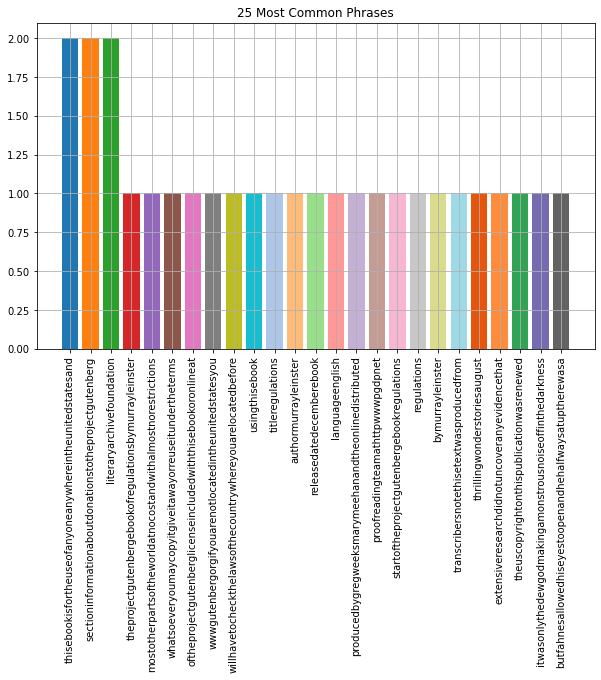

In [60]:
import nltk
from collections import Counter
import re
import matplotlib.pyplot as plt

# Download the list of stop words
nltk.download('stopwords')

# Get the list of stop words
stop_words = nltk.corpus.stopwords.words('english')

# Open the text file and preprocess the dataset
with open('666.txt', 'r') as f:
    # Only keep letters in the dataset
    raw_dataset = [re.sub('[^A-Za-z]+', '', st).lower().split() for st in f]

# Remove stop words from the dataset
filtered_dataset = [[word for word in st if word not in stop_words] for st in raw_dataset]

# Compute the counter with the filtered dataset
counter = Counter([tk for st in filtered_dataset for tk in st])

# Create a dictionary of the 25 most common phrases
most_common_25 = dict(counter.most_common(25))

# Get the list of phrases and their counts
phrases = list(most_common_25.keys())
counts = list(most_common_25.values())

# Set the figure size and title
plt.figure(figsize=(10, 6))
plt.title("25 Most Common Phrases")

# Plot the bar chart with a grid and different colors for each bar
plt.bar(phrases, counts, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                                '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                                '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',
                                '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5',
                                '#e6550d', '#fd8d3c', '#31a354', '#756bb1', '#636363'])

# Add a grid
plt.grid(True)

# Rotate the x-tick labels
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [46]:
import re
from nltk.tokenize import word_tokenize
import collections

# Open the text file and preprocess the dataset
with open('bible.txt', 'r') as f:
    # Only keep letters in the dataset
    raw_dataset = [re.sub('[^A-Za-z]+', '', st).lower().split() for st in f]

# Flatten the dataset into a single list of words
words = [word for st in raw_dataset for word in st]

# Count the frequency of each word
counter = collections.Counter(words)

# Calculate the total number of instances of all words
total_instances = sum(count for _, count in counter.items())

# Get the 25 most common words and their counts
most_common_25 = counter.most_common(25)

# Calculate the total number of instances of the 25 most common words
total_instances_most_common_25 = sum(count for _, count in most_common_25)

# Print the results
print("Total number of instances of all words:", total_instances)
print("25 most common words and their counts:", most_common_25)
print("Total number of instances of the 25 most common words:", total_instances_most_common_25)


Total number of instances of all words: 74939
25 most common words and their counts: [('lord', 75), ('them', 67), ('him', 58), ('god', 52), ('thee', 51), ('me', 46), ('israel', 37), ('it', 31), ('people', 30), ('jerusalem', 30), ('thelord', 25), ('ever', 23), ('you', 19), ('andthelordspakeuntomosessayingspeakuntothe', 18), ('selah', 16), ('day', 15), ('house', 15), ('christ', 15), ('away', 14), ('egypt', 14), ('thereof', 14), ('not', 14), ('congregation', 14), ('endurethforever', 14), ('theearth', 13)]
Total number of instances of the 25 most common words: 720


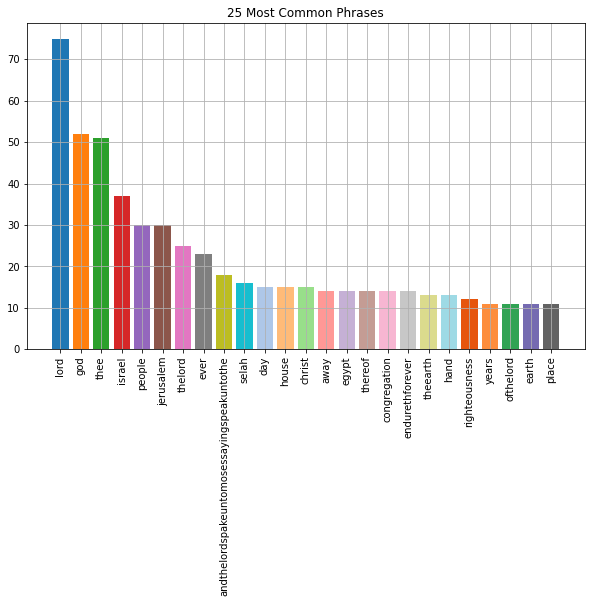

In [61]:
import re
from collections import Counter
from nltk.corpus import stopwords
from matplotlib import pyplot as plt

# Open the text file and preprocess the dataset
with open('bible.txt', 'r') as f:
    # Only keep letters in the dataset and split it into individual words
    raw_dataset = [re.sub('[^A-Za-z]+', '', st).lower().split() for st in f]

# Get the list of stop words
stop_words = set(stopwords.words('english'))

# Remove stop words from the dataset
filtered_dataset = [[word for word in st if word not in stop_words] for st in raw_dataset]

# Compute the counter with the filtered dataset
counter = Counter([tk for st in filtered_dataset for tk in st])

# Get the 25 most common phrases
most_common_25 = counter.most_common(25)

# Get the list of phrases and their counts
phrases, counts = zip(*most_common_25)

# Set the figure size and title
plt.figure(figsize=(10, 6))
plt.title("25 Most Common Phrases")

# Plot the bar chart with a grid and different colors for each bar
plt.bar(phrases, counts, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                                '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                                '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',
                                '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5',
                                '#e6550d', '#fd8d3c', '#31a354', '#756bb1', '#636363'])

# Add a grid
plt.grid(True)

# Rotate the x-tick labels
plt.xticks(rotation=90)

# Show the plot
plt.show()


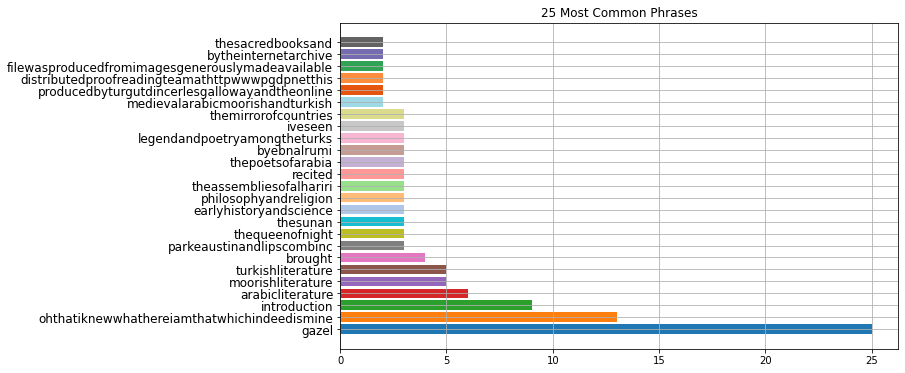

In [64]:
import re
from collections import Counter
from nltk.corpus import stopwords
from matplotlib import pyplot as plt

# Open the text file and preprocess the dataset
with open('kin.txt', 'r') as file:
    # Only keep letters in the dataset and split it into individual words
    raw_dataset = [re.sub('[^A-Za-z]+', '', st).lower().split() for st in file]

# Get the list of stop words
stop_words = set(stopwords.words('english'))

# Remove stop words from the dataset
filtered_dataset = [[word for word in st if word not in stop_words] for st in raw_dataset]

# Compute the counter with the filtered dataset
counter = Counter([tk for st in filtered_dataset for tk in st])

# Get the 25 most common phrases
most_common_25 = counter.most_common(25)

# Get the list of phrases and their counts
phrases, counts = zip(*most_common_25)

# Set the figure size and title
plt.figure(figsize=(10, 6))
plt.title("25 Most Common Phrases")

# Plot the bar chart with a grid and different colors for each bar
plt.barh(phrases, counts, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                                 '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                                 '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',
                                 '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5',
                                 '#e6550d', '#fd8d3c', '#31a354', '#756bb1', '#636363'])

# Add a grid
plt.grid(True)

# Adjust the word labels to make them easier to read
plt.yticks(rotation=0, horizontalalignment='right', fontsize='large')

# Show the plot
plt.show()


In [49]:
import re
import pprint

# Open the text file and preprocess the dataset
with open('bible.txt', 'r') as f:
    # Only keep letters in the dataset
    raw_dataset = [re.sub('[^A-Za-z]+', '', st).lower().split() for st in f]

# Flatten the dataset into a single list of words
words = [word for st in raw_dataset for word in st]

# Count the frequency of each word
counter = collections.Counter(words)

# Calculate the total number of instances of all words
total_instances = sum(count for _, count in counter.items())

# Get the 25 most common words and their counts
most_common_25 = counter.most_common(25)

# Calculate the total number of instances of the 25 most common words
total_instances_most_common_25 = sum(count for _, count in most_common_25)

# Generate a string representation of the results using pprint
results_string = pprint.pformat({"Total number of instances of all words": total_instances,
                                 "25 most common words and their counts": most_common_25,
                                 "Total number of instances of the 25 most common words": total_instances_most_common_25})

# Write the results to a file
with open('output.txt', 'w') as f:
    f.write(results_string)


In [51]:
pprint.pprint(results_string) 

("{'25 most common words and their counts': [('lord', 75),\n"
 "                                           ('them', 67),\n"
 "                                           ('him', 58),\n"
 "                                           ('god', 52),\n"
 "                                           ('thee', 51),\n"
 "                                           ('me', 46),\n"
 "                                           ('israel', 37),\n"
 "                                           ('it', 31),\n"
 "                                           ('people', 30),\n"
 "                                           ('jerusalem', 30),\n"
 "                                           ('thelord', 25),\n"
 "                                           ('ever', 23),\n"
 "                                           ('you', 19),\n"
 '                                           '
 "('andthelordspakeuntomosessayingspeakuntothe',\n"
 '                                            18),\n'
 "                                  

In [67]:
import re
import pprint

# Open the text file and preprocess the dataset
with open('bible.txt', 'r') as f:
    # Only keep letters in the dataset
    raw_dataset = [re.sub('[^A-Za-z]+', '', st).lower().split() for st in f]

# Flatten the dataset into a single list of words
words = [word for st in raw_dataset for word in st]

# Count the frequency of each word
counter = collections.Counter(words)

# Calculate the total number of instances of all words
total_instances = sum(count for _, count in counter.items())

# Get the 25 most common words and their counts
most_common_25 = counter.most_common(25)

# Calculate the total number of instances of the 25 most common words
total_instances_most_common_25 = sum(count for _, count in most_common_25)

# Print the results using pprint
pprint.pprint({"Total number of instances of all words": total_instances,
               "25 most common words and their counts": most_common_25,
               "Total number of instances of the 25 most common words": total_instances_most_common_25})

{'25 most common words and their counts': [('lord', 75),
                                           ('them', 67),
                                           ('him', 58),
                                           ('god', 52),
                                           ('thee', 51),
                                           ('me', 46),
                                           ('israel', 37),
                                           ('it', 31),
                                           ('people', 30),
                                           ('jerusalem', 30),
                                           ('thelord', 25),
                                           ('ever', 23),
                                           ('you', 19),
                                           ('andthelordspakeuntomosessayingspeakuntothe',
                                            18),
                                           ('selah', 16),
                                           ('day', 15),
 

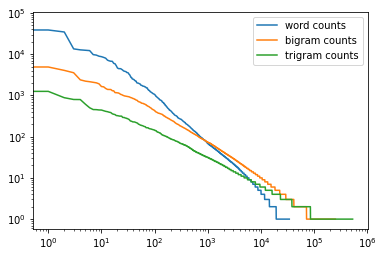

In [4]:
import collections
import matplotlib.pyplot as plt

# Read the text file and split it into words
with open('bible.txt', 'r') as file:
    text = file.read()
words = text.split()

# Create a Counter object with the words
counter = collections.Counter(words)

# Create a Counter object with the bigrams (i.e. pairs of consecutive words)
bigrams = [pair for pair in zip(words[:-1], words[1:])]
counter_bigrams = collections.Counter(bigrams)

# Create a Counter object with the trigrams (i.e. triples of consecutive words)
trigrams = [triple for triple in zip(words[:-2], words[1:-1], words[2:])]
counter_trigrams = collections.Counter(trigrams)

# Generate a list of word counts for the most common 10000 words in the counter object
wordcounts = [count for _, count in counter.most_common(10000000000000)]

# Generate a list of bigram counts for the most common bigrams in the counter_bigrams object
bigramcounts = [count for _, count in counter_bigrams.most_common()]

# Generate a list of trigram counts for the most common trigrams in the counter_trigrams object
trigramcounts = [count for _, count in counter_trigrams.most_common()]

# Plot the word counts, bigram counts, and trigram counts on a log-log scale
plt.loglog(wordcounts, label='word counts')
plt.loglog(bigramcounts, label='bigram counts')
plt.loglog(trigramcounts, label='trigram counts')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


/tmp/ipykernel_950/810931597.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


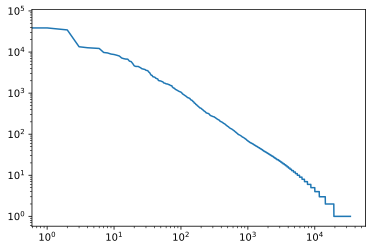

In [7]:
%matplotlib inline 
from matplotlib import pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

wordcounts = [count for _,count in counter.most_common()]
plt.loglog(wordcounts);

In [8]:
wseq = [tk for st in raw_dataset for tk in st]
word_pairs = [pair for pair in zip(wseq[:-1], wseq[1:])]
print('Beginneing of the book\n', word_pairs[:10])
counter_pairs = collections.Counter(word_pairs)
print('Most common word pairs\n', counter_pairs.most_common(10))

Traceback (most recent call last):
  Input In [8] in <cell line: 1>
    wseq = [tk for st in raw_dataset for tk in st]
NameError: name 'raw_dataset' is not defined

Use %tb to get the full traceback.


Custom TB Handler failed, unregistering


---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
    [... skipping hidden 1 frame]

Input In [8], in <cell line: 1>()
----> 1 wseq = [tk for st in raw_dataset for tk in st]
      2 word_pairs = [pair for pair in zip(wseq[:-1], wseq[1:])]

NameError: name 'raw_dataset' is not defined

During handling of the above exception, another exception occurred:

TypeError                                 Traceback (most recent call last)
File ~/.ipython/profile_default/startup/00_start.py:83, in custom_exc(shell, etype, evalue, tb, tb_offset)
     81 html = HTML(html_str)
     82 if IN_JUPYTER:
---> 83   display(html)

TypeError: 'module' object is not callable
The original exception:


In [6]:
word_triples = [triple for triple in zip(wseq[:-2], wseq[1:-1], wseq[2:])]
counter_triples = collections.Counter(word_triples)


wordcounts = [count for _,count in counter.most_common(10000)]
bigramcounts = [count for _,count in counter_pairs.most_common()]
triplecounts = [count for _,count in counter_triples.most_common()]
plt.loglog(wordcounts, label='word counts');
plt.loglog(bigramcounts, label='bigram counts');
plt.loglog(triplecounts, label='triple counts');
plt.legend();

Traceback (most recent call last):
  Input In [6] in <cell line: 1>
    word_triples = [triple for triple in zip(wseq[:-2], wseq[1:-1], wseq[2:])]
NameError: name 'wseq' is not defined

Use %tb to get the full traceback.


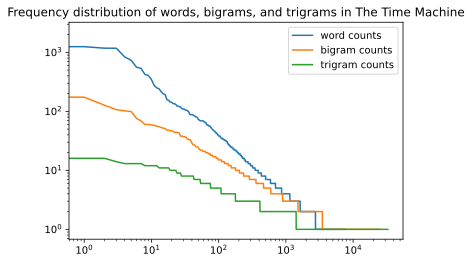

In [16]:
import collections
import matplotlib.pyplot as plt

def plot_frequency_distribution(filename, words, counter, counter_bigrams, counter_trigrams):
    # Generate a list of word counts for the most common words in the counter object
    wordcounts = [count for _, count in counter.most_common()]
    
    # Generate a list of bigram counts for the most common bigrams in the counter_bigrams object
    bigramcounts = [count for _, count in counter_bigrams.most_common()]
    
    # Generate a list of trigram counts for the most common trigrams in the counter_trigrams object
    trigramcounts = [count for _, count in counter_trigrams.most_common()]
    
    # Plot the word counts, bigram counts, and trigram counts on a log-log scale
    plt.loglog(wordcounts, label='word counts')
    plt.loglog(bigramcounts, label='bigram counts')
    plt.loglog(trigramcounts, label='trigram counts')
    
    # Add a title to the plot
    plt.title(f"Frequency distribution of words, bigrams, and trigrams in {filename}")
    
    # Add a legend to the plot
    plt.legend()
    
    # Show the plot
    plt.show()


# Read the text file and split it into words
with open('time/timemachine.txt', 'r') as file:
    text = file.read()
words = text.split()

# Create a Counter object with the words
counter = collections.Counter(words)

# Create a Counter object with the bigrams (i.e. pairs of consecutive words)
bigrams = [pair for pair in zip(words[:-1], words[1:])]
counter_bigrams = collections.Counter(bigrams)

# Create a Counter object with the trigrams (i.e. triples of consecutive words)
trigrams = [triple for triple in zip(words[:-2], words[1:-1], words[2:])]
counter_trigrams = collections.Counter(trigrams)

# Plot the frequency distribution of words, bigrams, and trigrams
plot_frequency_distribution('The Time Machine', words, counter, counter_bigrams, counter_trigrams)



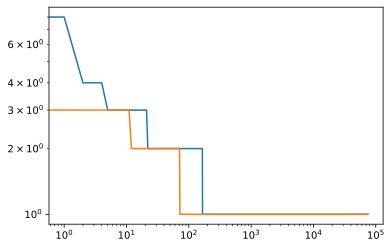

In [79]:
wordcounts = [count for _,count in counter.most_common()]
bigramcounts = [count for _,count in counter_pairs.most_common()]
triplecounts = [count for _,count in counter_triples.most_common()]

#plt.loglog(wordcounts, label='word counts');
plt.loglog(bigramcounts, label='bigram counts');
plt.loglog(triplecounts, label='triple counts');


In [80]:
import sys 
sys.path.insert(0, '..')

from mxnet import nd
import random

import re
with open('time/bible.txt','r') as f:
    lines = f.readlines()
    raw_dataset = ' '.join(' '.join(lines).lower().split())

print('number of characters: ', len(raw_dataset))
print(raw_dataset[0:70])


number of characters:  4324026
1:1 in the beginning god created the heaven and the earth. 1:2 and the


In [81]:
idx_to_char = list(set(raw_dataset))
char_to_idx = dict([(char, i) for i, char in enumerate(idx_to_char)])
vocab_size = len(char_to_idx)
print(char_to_idx)

{')': 0, '5': 1, '9': 2, '?': 3, 's': 4, '0': 5, 'r': 6, '8': 7, '/': 8, 'l': 9, 'e': 10, '4': 11, '%': 12, "'": 13, '6': 14, 'd': 15, '@': 16, 'v': 17, 'n': 18, '.': 19, 'q': 20, 'o': 21, 'z': 22, '(': 23, 'g': 24, 'w': 25, 'u': 26, ',': 27, 'p': 28, ':': 29, 'h': 30, 'a': 31, 'f': 32, 't': 33, 'y': 34, 'i': 35, '2': 36, 'c': 37, ' ': 38, '$': 39, ';': 40, '!': 41, '"': 42, '1': 43, '-': 44, '3': 45, 'k': 46, 'j': 47, '7': 48, 'm': 49, '*': 50, 'b': 51, 'x': 52}


In [82]:
corpus_indices = [char_to_idx[char] for char in raw_dataset]
sample = corpus_indices[:10]
print('char:', ''.join([idx_to_char[idx] for idx in sample]))
print('indices:', sample)

char: 1:1 in the
indices: [43, 29, 43, 38, 35, 18, 38, 33, 30, 10]


In [86]:
def data_iter_random(corpus_indices, batch_size, num_steps, ctx=None):
    offset = int(random.uniform(0,num_steps))
    corpus_indices =corpus_indices[offset:]
    num_examples = ((len(corpus_indices) -1) // num_steps) -1
    num_batches = num_examples // batch_size
    example_indices = list(range(0, num_examples + num_steps, num_steps))
    random.shuffle(example_indices)
    
    def _data(pos):
        return corpus_indices[pos: pos + num_steps]
    
    for i in range(0, batch_size * num_batches, batch_size):
        batch_indices = example_indices[i:(i+batch_size)]
        x = [_data(j) for j in batch_indices]
        y = [_data(j + 1) for j in batch_indices]
        
        yield nd.array(x, ctx), nd.array(y, ctx)      
        
my_seq = list(range(70))
for x, y in data_iter_random(my_seq, batch_size=5, num_steps=7):
    print('x:', x, '\ny:', y)

x: 
[[ 7.  8.  9. 10. 11. 12. 13.]
 [14. 15. 16. 17. 18. 19. 20.]
 [ 0.  1.  2.  3.  4.  5.  6.]]
<NDArray 3x7 @cpu(0)> 
y: 
[[ 8.  9. 10. 11. 12. 13. 14.]
 [15. 16. 17. 18. 19. 20. 21.]
 [ 1.  2.  3.  4.  5.  6.  7.]]
<NDArray 3x7 @cpu(0)>


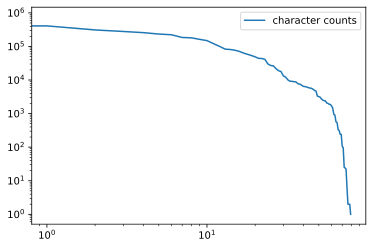

In [9]:
import collections
import matplotlib.pyplot as plt

# Read the text file and split it into characters
with open('bible.txt', 'r') as file:
    text = file.read()
characters = list(text)

# Create a Counter object with the characters
counter = collections.Counter(characters)

# Generate a list of character counts for the most common characters in the counter object
charactercounts = [count for _, count in counter.most_common()]

# Plot the character counts on a log-log scale
plt.loglog(charactercounts, label='character counts')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


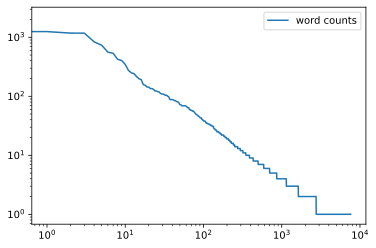

In [13]:
import collections
import matplotlib.pyplot as plt

# Read the text file and split it into words
with open('time/timemachine.txt', 'r') as file:
    text = file.read()
words = text.split()

# Create a Counter object with the words
counter = collections.Counter(words)

# Generate a list of word counts for the most common words in the counter object
wordcounts = [count for _, count in counter.most_common()]

# Plot the word counts on a log-log scale
plt.loglog(wordcounts, label='word counts')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


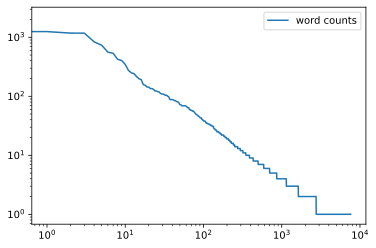

In [14]:
import collections
import matplotlib.pyplot as plt

# Read the text file and split it into words
with open('bible.txt', 'r') as file:
    text = file.read()
words = text.split()

# Create a Counter object with the words
counter = collections.Counter(words)

# Generate a list of word counts for the most common words in the counter object
wordcounts = [count for _, count in counter.most_common()]

# Plot the word counts on a log-log scale
plt.loglog(wordcounts, label='word counts')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

In [87]:
print('x:', x)
print('y:', y)

x: 
[[ 7.  8.  9. 10. 11. 12. 13.]
 [14. 15. 16. 17. 18. 19. 20.]
 [ 0.  1.  2.  3.  4.  5.  6.]]
<NDArray 3x7 @cpu(0)>
y: 
[[ 8.  9. 10. 11. 12. 13. 14.]
 [15. 16. 17. 18. 19. 20. 21.]
 [ 1.  2.  3.  4.  5.  6.  7.]]
<NDArray 3x7 @cpu(0)>


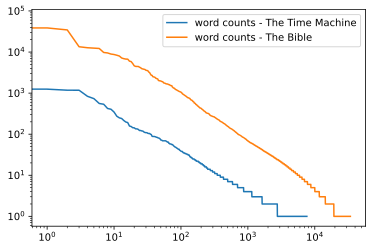

In [15]:
import collections
import matplotlib.pyplot as plt

# Read the first text file and split it into words
with open('time/timemachine.txt', 'r') as file:
    text = file.read()
words = text.split()

# Create a Counter object with the words
counter = collections.Counter(words)

# Generate a list of word counts for the most common words in the counter object
wordcounts = [count for _, count in counter.most_common()]

# Plot the word counts on a log-log scale for the first text file
plt.loglog(wordcounts, label='word counts - The Time Machine')

# Read the second text file and split it into words
with open('bible.txt', 'r') as file:
    text = file.read()
words = text.split()

# Create a Counter object with the words
counter = collections.Counter(words)

# Generate a list of word counts for the most common words in the counter object
wordcounts = [count for _, count in counter.most_common()]

# Plot the word counts on a log-log scale for the second text file
plt.loglog(wordcounts, label='word counts - The Bible')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()
